In [38]:
%matplotlib inline  
import matplotlib.pyplot as plt

import random
import math
import numpy as np

T = 10
dt = 0.1
N = round(T/dt)
t = np.linspace(0, T, N)
X0 = 50
S0 = 100

# initialize securities number and price for each step
X = [X0] * N
S = S0 + np.cos(np.arange(0, T, dt))

# traders list
traders = []

# create traders class
class RandomTrader:
    def __init__(self, stock):
        self.X = stock.copy()
    
    def random_trade(self):
        return np.random.randint(-2, 3)

    def trade(self, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.random_trade()
            
    def show_stock(self):
        return self.X
    
class TrendFollower:
    def __init__(self, stock):
        self.X = stock.copy()
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 1:
            return 0
        if S[current_step - 1] < S[current_step - 2]:
            return np.random.randint(-2, 0)
        elif S[current_step - 1] > S[current_step - 2]:
            return np.random.randint(1, 3)
        else:
            return 0

    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.trend_following_trade(S, current_step)
            
    def show_stock(self):
        return self.X
    
class MeanAversion:
    def __init__(self, stock):
        self.X = stock
        
    def mean_aversion_trade(self, S, current_step):
        if current_step <= 2:
            return 0
        mean = sum(S[current_step - 3:current_step])/3
        if S[current_step] > mean:
            return np.random.randint(-2, 0)
        elif S[current_step] < mean:
            return np.random.randint(1, 3)
        else:
            return 0
        
    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.mean_aversion_trade(S, current_step)
            
    def show_stock(self):
        return self.X

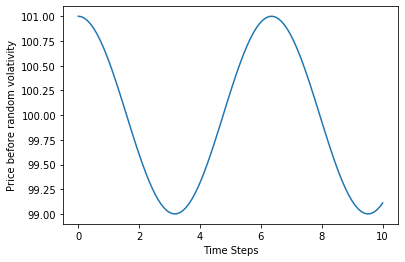

In [39]:
plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before random volativity')
plt.show()

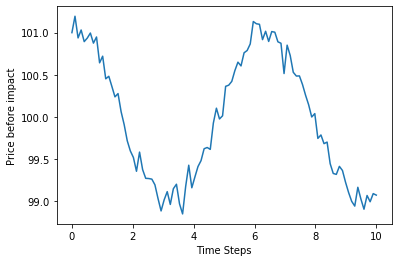

In [40]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, N - 1), 0, 0.0)

## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0.1

S =[S[i] + volativity_factor(volativity, xi[i]) for i in range(N)]

plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

In [41]:
## add trader
# traders list
traders[:] = []
traders

for i in range(10):
    traders.append(MeanAversion(X))

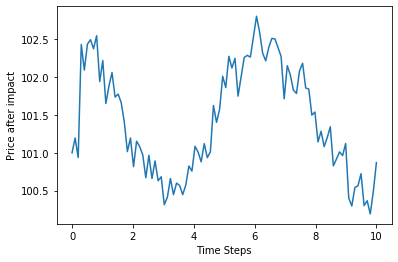

In [42]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

gamma = 0.1
epsilon = 0.1
eta = 0.1

# market price with a random trader and a trend follower
S_temp = S.copy()

n = np.zeros(np.shape(X))
step = 0
for i in range(N):
    step = step + 1
    for trader in traders:
        trader.trade(S_temp, i)
        n[i] += trader.show_stock()[i] - trader.show_stock()[i - 1]
    S_temp[i] = S_temp[i] + permanent_impact(n[i], gamma)
        
plt.plot(t, S_temp)
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()

In [43]:
X1 = traders[0].show_stock()
X2 = traders[1].show_stock()

In [44]:
X1

[50,
 50,
 50,
 51,
 52,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 76,
 78,
 79,
 80,
 82,
 84,
 86,
 88,
 89,
 90,
 92,
 94,
 96,
 98,
 100,
 101,
 102,
 104,
 106,
 107,
 108,
 110,
 111,
 112,
 114,
 115,
 116,
 118,
 119,
 121,
 123,
 125,
 126,
 127,
 129,
 130,
 131,
 133,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 152,
 153,
 155,
 156,
 158,
 160,
 162,
 164,
 165,
 167,
 169,
 170,
 172,
 174,
 176,
 178,
 179,
 180,
 181,
 183,
 185,
 186,
 187,
 188,
 190,
 192]

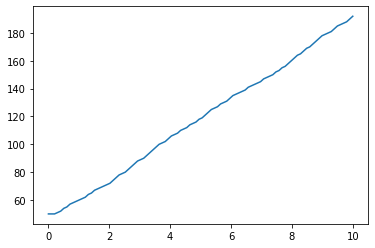

In [46]:
plt.plot(t, X1)

In [37]:
n

array([  0.,   0.,   0., -17., -16., -15., -14., -15., -16., -14., -18.,
       -13., -17., -15., -13., -15., -16., -13., -16., -18., -16., -13.,
       -15., -14., -15., -14., -16., -15., -17., -19., -18., -16., -17.,
       -16., -17., -16., -14., -15., -15., -15., -16., -14., -16., -15.,
       -13., -16., -14., -14., -13., -16., -15., -13., -14., -15., -16.,
       -15., -15., -15., -16., -17., -14., -13., -14., -16., -14., -15.,
       -15., -14., -13., -16., -14., -16., -16., -13., -13., -17., -15.,
       -14., -14., -15., -15., -16., -17., -12., -17., -15., -12., -13.,
       -16., -14., -17., -18., -15., -14., -17., -14., -15., -14., -13.,
       -13.])